# Spam Email Classification Project
    in this project we classify emails as either email is 'spam' or 'not spam'.
    As our result will belong to some class so this problem belongs to 'Classification'.
    We have only two classes 'spam' and 'not spam', so this is binary classification problem.
    We use Logistic regression for binary classification so we apply Logistic Regression model to solve problem.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, roc_curve, auc

sns.set(style="whitegrid")
np.random.seed(42)


## Import Data

In [2]:
url="emails.csv.zip"
df=pd.read_csv(url)
print(df.shape)
print(df)


(5172, 3002)
       Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  

### Spam vs Not spam
    Now we show how many emails in our datta are spam and how many are not spam using bar chart and pie chart.

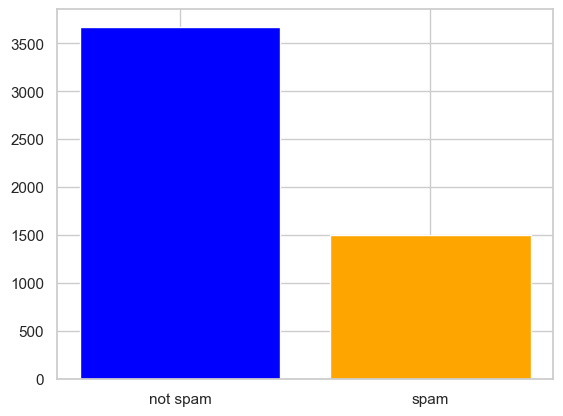

In [3]:
y_axis=df['Prediction'].value_counts()
x_axis=['not spam','spam']

#bar chart

plt.bar(x_axis,y_axis,color=['blue','orange'])
plt.show()




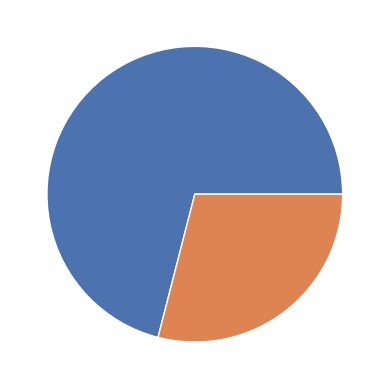

In [4]:
# pie chart

plt.pie(y_axis)
plt.show()

### Data understanding
    from above data it is clear that we have data of 5172 emails in our data file.Which are rows of our data file.
    Our file has 3002 No of columns.From which first column is 'Email No' and we have no interest in this column.
    The last column is 'Prediction' that is our output(Label) of our model.
    Remaining 3000 columns have data of emails each column represents a word(heading of column) and number in this column represents
    how much time this word repeted in that particular email.so these 3000 columns contain inputs(features) of our model.
    From above discussion it is clear that we have one output(Label) column and 3000 inputs(Features) columns.
    Now we extract our input columns from data and put in new variable 'X'.
    and we save our output data in variable 'Y'

### Setting input and output data

In [5]:
X = df.drop(columns=['Email No.' , 'Prediction'])
Y=df['Prediction']
print(X.shape)
print(Y.shape)


(5172, 3000)
(5172,)


### Splitting data
    Now we split our data into training data set and test data set.
    we break our data set so that 70% of data will be used as training the model and remaining 30% will be used to evaluate the model performance. 
    we use 'x_train' and 'y_train' variable names to store input and output training data respectively.
    we use 'x_test' and 'y_test' variable name to store input and output test data respectively.

In [6]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(" x_train = ", x_train.shape, "\n", "y_train = ", y_train.shape,"\n", "x_test = ", x_test.shape,"\n", "y_test = ",y_test.shape)

 x_train =  (3620, 3000) 
 y_train =  (3620,) 
 x_test =  (1552, 3000) 
 y_test =  (1552,)


### Model designing
    Now we design logistic Regression model on our training data

In [7]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [8]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )


In [9]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc
}

In [10]:
# define a function to train a model and return accuracy
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [11]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, x_train, y_train, x_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.7068298969072165
Precision:  0.0

For:  KNN
Accuracy:  0.8608247422680413
Precision:  0.7311411992263056

For:  NB
Accuracy:  0.9484536082474226
Precision:  0.8818737270875764

For:  DT
Accuracy:  0.8505154639175257
Precision:  0.9239543726235742

For:  LR
Accuracy:  0.9664948453608248
Precision:  0.9314775160599572

For:  RF
Accuracy:  0.9742268041237113
Precision:  0.9560439560439561


### Conclusion
    From above results it is clear that  MultinomialNB , Logistic Regression , and Rnadom Forest Classifier has 
    higher Accuracy and Precision for our problem. So these three out of six models that we used are bestt in oue scinario.

## References

1. https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv/code

2. https://www.kaggle.com/code/devraai/email-spam-classification-prediction

3. https://www.kaggle.com/code/pspspspx/email-spam-detection-model-using-lr-xgboost

4. https://www.kaggle.com/code/sujithvl/email-spam-detection

5. https://www.kaggle.com/code/abdelrahmantamer11/email-spam-classification-with-naivebayes

6. https://www.youtube.com/watch?v=FkF2jhaRJIs

7. https://www.kaggle.com/code/meghasarath/laptop-price-prediction-with-88-accuracy